<a href="https://colab.research.google.com/github/QuantLet/Tukey/blob/master/TukeyEmpirical/TukeyEmpirical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[-0.0475977  -0.04116385 -0.03927213 ...  0.04019725  0.0420891
  0.04852346]


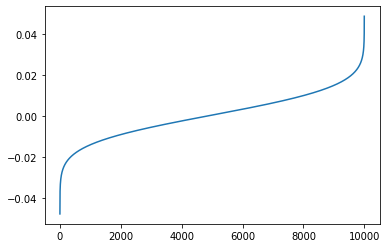

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive 
import scipy.stats as stats
import scipy.optimize as opt
from scipy.stats import norm
import matplotlib.pyplot as plt

drive.mount("/content/gdrive")

def tukeyroot2(x):

  F1 = -S+((3*np.exp(x[0]**2/(2-6*x[1]))+np.exp(9*x[0]**2/(2-6*x[1]))-3*np.exp(2*x[0]**2/(1-3*x[1]))-1)/(x[0]**3*(1-3*x[1])**(1/2))-
    3*((np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2)))*((1-2*np.exp(x[0]**2/(2-4*x[1]))+np.exp(2*x[0]**2/(1-2*x[1])))/(x[0]**2*(1-2*x[1])**(1/2)))+
    2*((np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2)))**3)/(((1-2*np.exp(x[0]**2/(2-4*x[1]))+np.exp(2*x[0]**2/(1-2*x[1])))/(x[0]**2*(1-2*x[1])**(1/2)))-
    ((np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2)))**2)**(3/2)
    
    
    
  F2 = -K+(((np.exp(8*x[0]**2/(1-4*x[1]))*(1+6*np.exp(6*x[0]**2/(4*x[1]-1))+np.exp(8*x[0]**2/(4*x[1]-1))-4*np.exp(7*x[0]**2/(8*x[1]-2))-4*np.exp(15*x[0]**2/(8*x[1]-2))))/(x[0]**4*(1-4*x[1])**(1/2)))-
    4*((3*np.exp(x[0]**2/(2-6*x[1]))+np.exp(9*x[0]**2/(2-6*x[1]))-3*np.exp(2*x[0]**2/(1-3*x[1]))-1)/(x[0]**3*(1-3*x[1])**(1/2)))*((np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2)))-
    3*((1-2*np.exp(x[0]**2/(2-4*x[1]))+np.exp(2*x[0]**2/(1-2*x[1])))/(x[0]**2*(1-2*x[1])**(1/2)))**2+
    12*((1-2*np.exp(x[0]**2/(2-4*x[1]))+np.exp(2*x[0]**2/(1-2*x[1])))/(x[0]**2*(1-2*x[1])**(1/2)))*((np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2)))**2-
     6*((np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2)))**4)/((((1-2*np.exp(x[0]**2/(2-4*x[1]))+np.exp(2*x[0]**2/(1-2*x[1])))/(x[0]**2*(1-2*x[1])**(1/2)))-((np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2)))**2)**2)

  return [F1, F2]



#Read data either locally or from gdrive
dax = pd.read_csv("gdrive/My Drive/dax2Y.csv", delimiter = ";", usecols = [1], header = None)
dax.dropna(inplace = True)
dax.rename(columns={dax.columns[0]: "Dax"}, inplace = True)
dax["Dax"] = [float(x.replace(",", ".")) for x in dax["Dax"]]

#Get Dax returns
dax["Dax"] = dax["Dax"].pct_change(1)
dax.dropna(inplace = True)

S = stats.skew(dax["Dax"])
K = stats.kurtosis(dax["Dax"])
mean = np.mean(dax["Dax"])
std = np.std(dax["Dax"])

#Find 'g' and 'h' values by solving the system of nonlinear equations
x0 = [1.1, 0.1]
x = opt.fsolve(tukeyroot2, x0)

g = x[0]
h = x[1]

#Calculate two central moments of Tukey distribution as well as expectation and variance
E1 = (np.exp(x[0]**2/(2-2*x[1]))-1)/(x[0]*(1-x[1])**(1/2))
E2 = (1-2*np.exp(x[0]**2/(2-4*x[1]))+np.exp(2*x[0]**2/(1-2*x[1])))/(x[0]**2*(1-2*x[1])**(1/2))

tukey_mean = E1
tukey_variance = E2-E1**2

#For reference see Headrick et al. (2008), "Parametric probability
#densities and distribution functions for Tukey g- and h- Transformations
#and their Use for Fitting Data", Applied Mathematical Science 2/9,
#449-462.

